In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
# df = pd.read_csv('F:\\iNeuron\\Projects\\Data\\Scania Truck Failures\\archive\\aps_failure_training_set.csv')

In [4]:
df = pd.read_csv('https://github.com/Raj-Narayanan-B/Dataset/raw/main/Scania%20Truck%20APS%20Failure/aps_failure_training_set.csv')

In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
cols = df.columns.tolist()[1:]

In [7]:
# col=list(df.columns)
# for k in col:
#     lst=[]
#     strng='1'
#     null_list=['na','nan','null']
#     for i in range(len(df[k])):
#         strng=str(df[k][i])
#         for l in strng:
#             for a in null_list:
#                 if (strng.casefold()==a):
#                     lst.append(strng)
#             if (strng.isdigit()):
#                 i+=1
#             elif (strng.isalpha()):
#                 if (not(l in string.ascii_letters)):
#                     lst.append(strng)
#                 i+=1
#             else:
#                 if (not(l in string.digits)):
#                     try:
#                         if isinstance(float(strng),float):
#                             i+=1
#                     except:
#                         lst.append(strng)
#     if (len(lst)!=0):
#         print (k,"\n",pd.unique(lst),"\n")

In [8]:
# for i in cols:
#     df[i]=pd.to_numeric(df[i],errors='coerce',downcast='integer')

In [9]:
for i in cols:
    df[i].replace('na',np.nan,inplace=True)

In [10]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [11]:
for i in cols:
    df[i]=df[i].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 78.3+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [14]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [15]:
df['class']=df['class'].map({'neg':0,'pos':1})

In [16]:
df['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [18]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
np.sort(df.isna().sum())

array([    0,     0,   167,   338,   338,   338,   473,   589,   589,
         589,   589,   629,   629,   629,   629,   629,   629,   642,
         642,   642,   642,   642,   645,   645,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   676,   687,   687,   687,   687,   687,   687,
         687,   687,   687,   687,   688,   688,   688,   688,   688,
         688,   688,   688,   688,   688,   691,   691,   691,   691,
         726,   726,  2500,  2500,  2500,  2500,  2501,  2502,  2503,
        2503,  2723,  2723,  2723,  2723,  2723,  2723,  2724,  2724,
        2724,  2724,  2724,  2725,  2726,  2726,  2726,  2726,  2726,
        2727,  2727,

<Axes: >

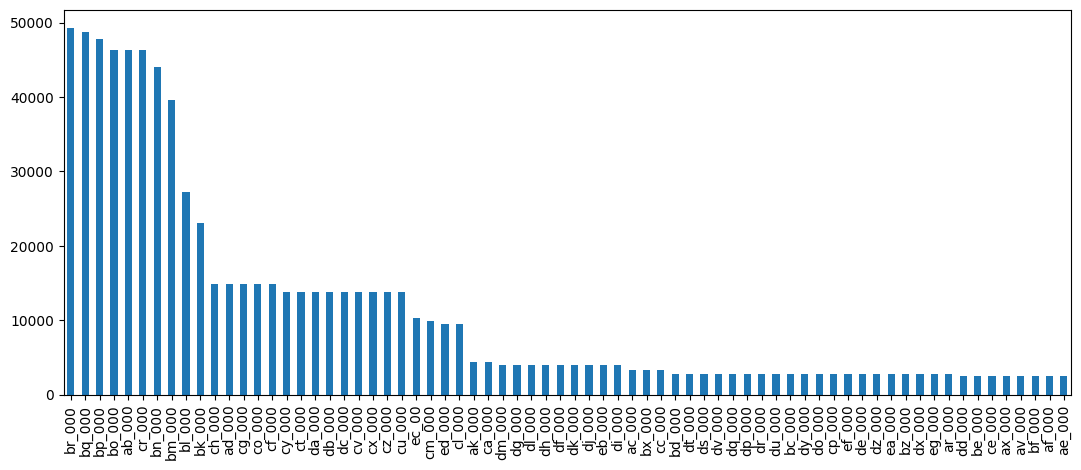

In [20]:
df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).plot(kind='bar',figsize=(13,5))

In [21]:
df['br_000'].shape

(60000,)

In [22]:
df.shape

(60000, 171)

In [23]:
(df.isna().sum()[df.isna().sum()>30000]/60000)*100

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64

In [24]:
pd.DataFrame(data=(df.isna().sum()[df.isna().sum()>30000],(df.isna().sum()[df.isna().sum()>30000]/60000)*100)).T.sort_values(by=1,ascending=False)

,0,1
br_000,49264.0,82.106667
bq_000,48722.0,81.203333
bp_000,47740.0,79.566667
bo_000,46333.0,77.221667
ab_000,46329.0,77.215000
cr_000,46329.0,77.215000
bn_000,44009.0,73.348333
bm_000,39549.0,65.915000


In [25]:
describe_cols = df.isna().sum()[df.isna().sum()>30000].index
df[describe_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ab_000,13671.0,0.713189,3.478962,0.0,0.0,0.0,0.0,204.0
bm_000,20451.0,399603.167571,407071.846632,0.0,172210.0,239140.0,369100.0,1310700.0
bn_000,15991.0,463710.833594,464447.341741,0.0,171720.0,251400.0,493100.0,1310700.0
bo_000,13667.0,513147.820297,497353.671372,0.0,170550.0,270660.0,1310700.0,1310700.0
bp_000,12260.0,551389.799347,519611.447203,0.0,172170.0,288320.0,1310700.0,1310700.0
bq_000,11278.0,582871.322930,536697.028750,0.0,170420.0,305100.0,1310700.0,1310700.0
br_000,10736.0,604886.613264,547227.872331,0.0,169470.0,320400.0,1310700.0,1310700.0
cr_000,13671.0,37.062980,1027.001381,0.0,0.0,0.0,0.0,57450.0


In [26]:
df.drop(columns=describe_cols,axis = 1, inplace = True)

In [27]:
df.shape

(60000, 163)

In [29]:
missing_data_index_2000 = df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).index

In [30]:
len(missing_data_index_2000)

62

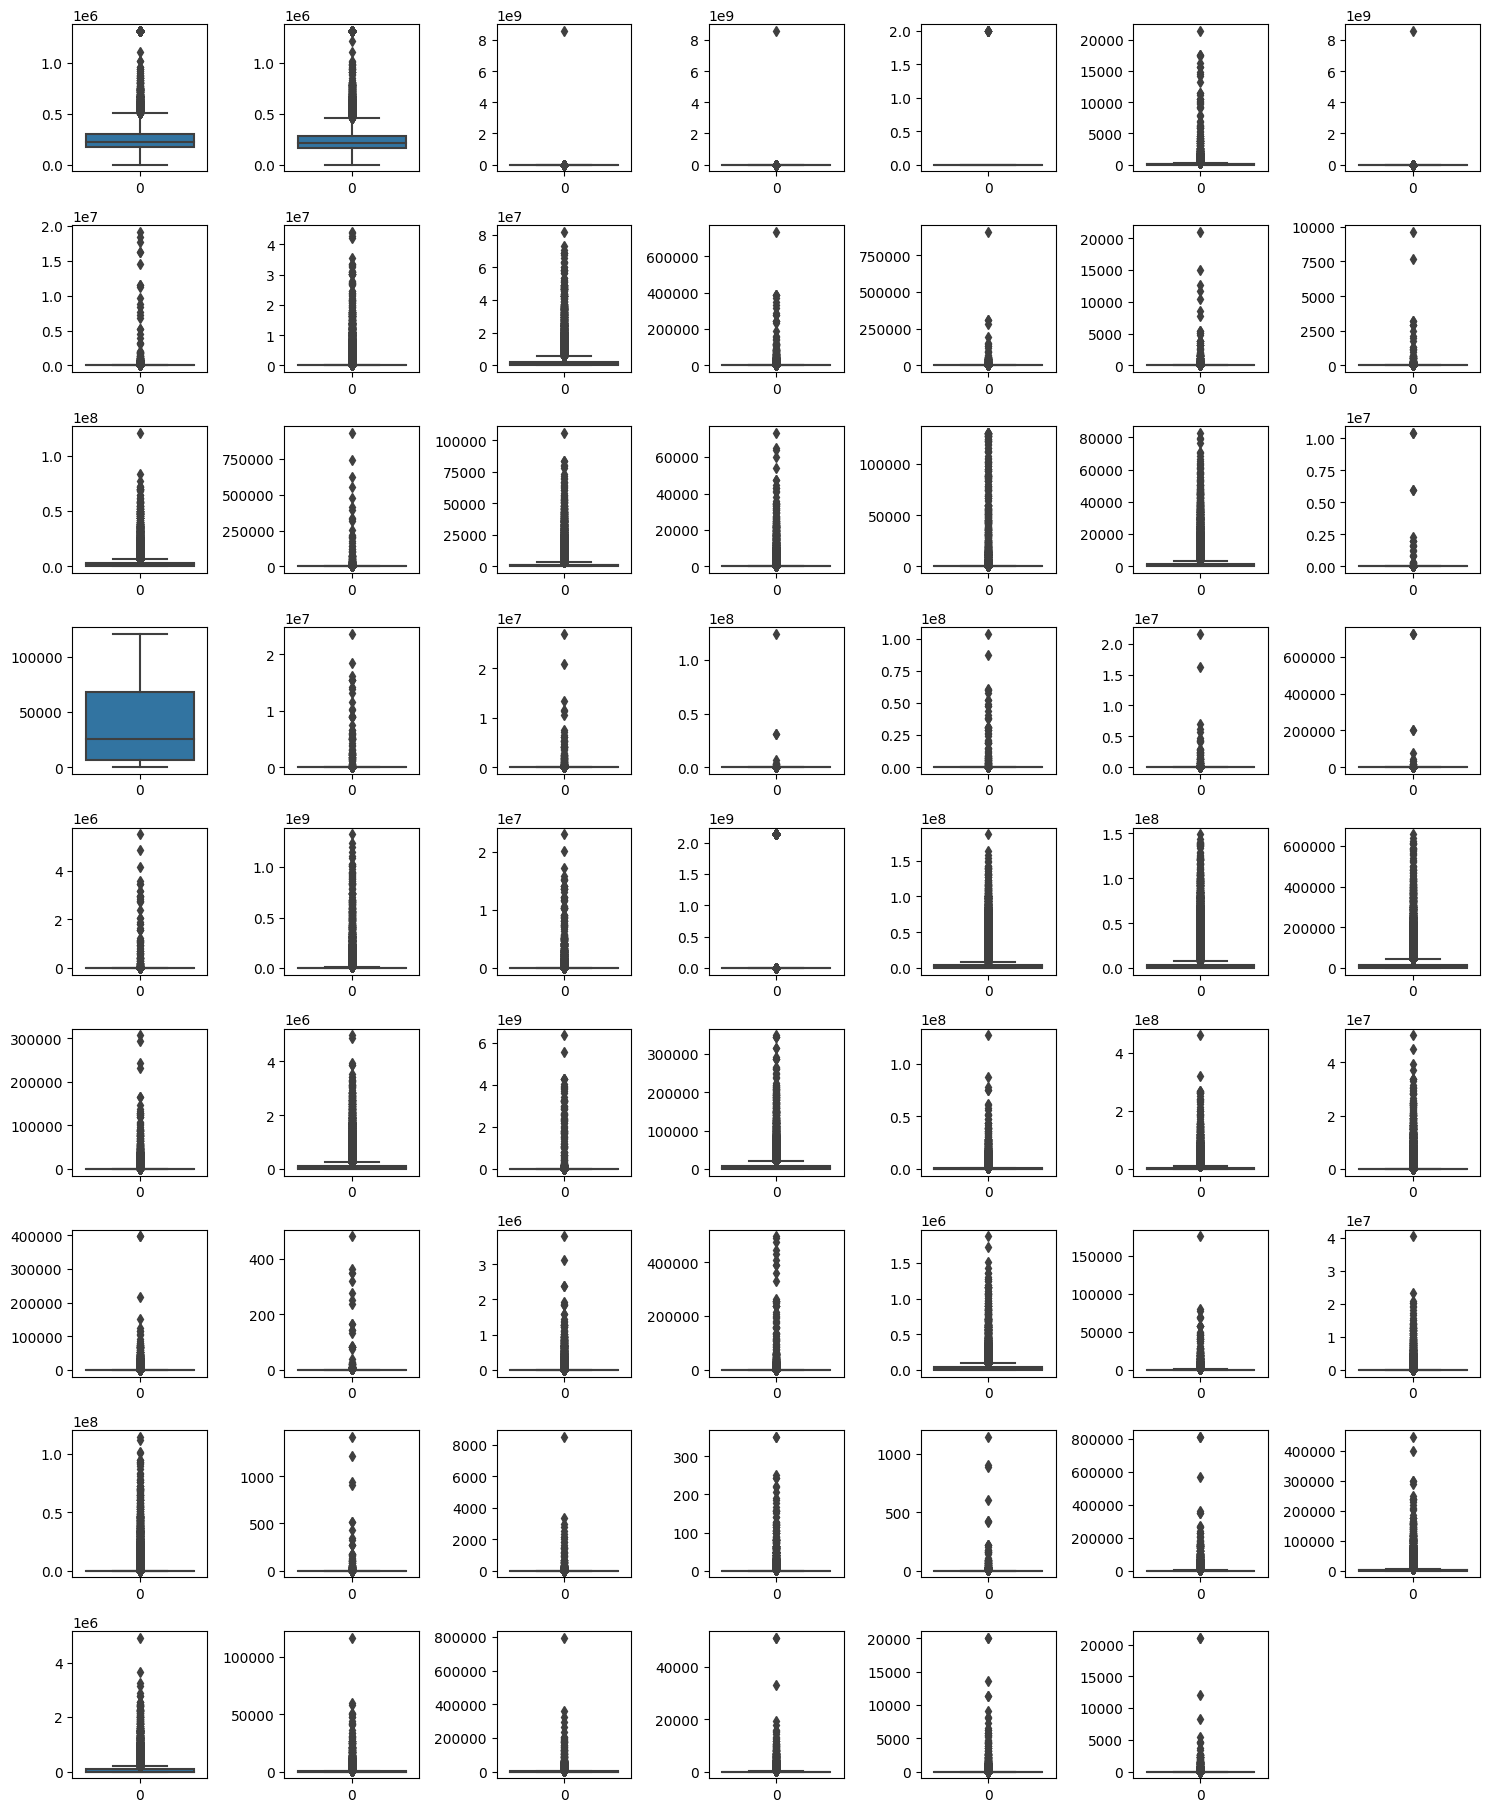

In [31]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    boxplot_object = sns.boxplot(df[missing_data_index_2000[i]])
plt.tight_layout()
plt.show()

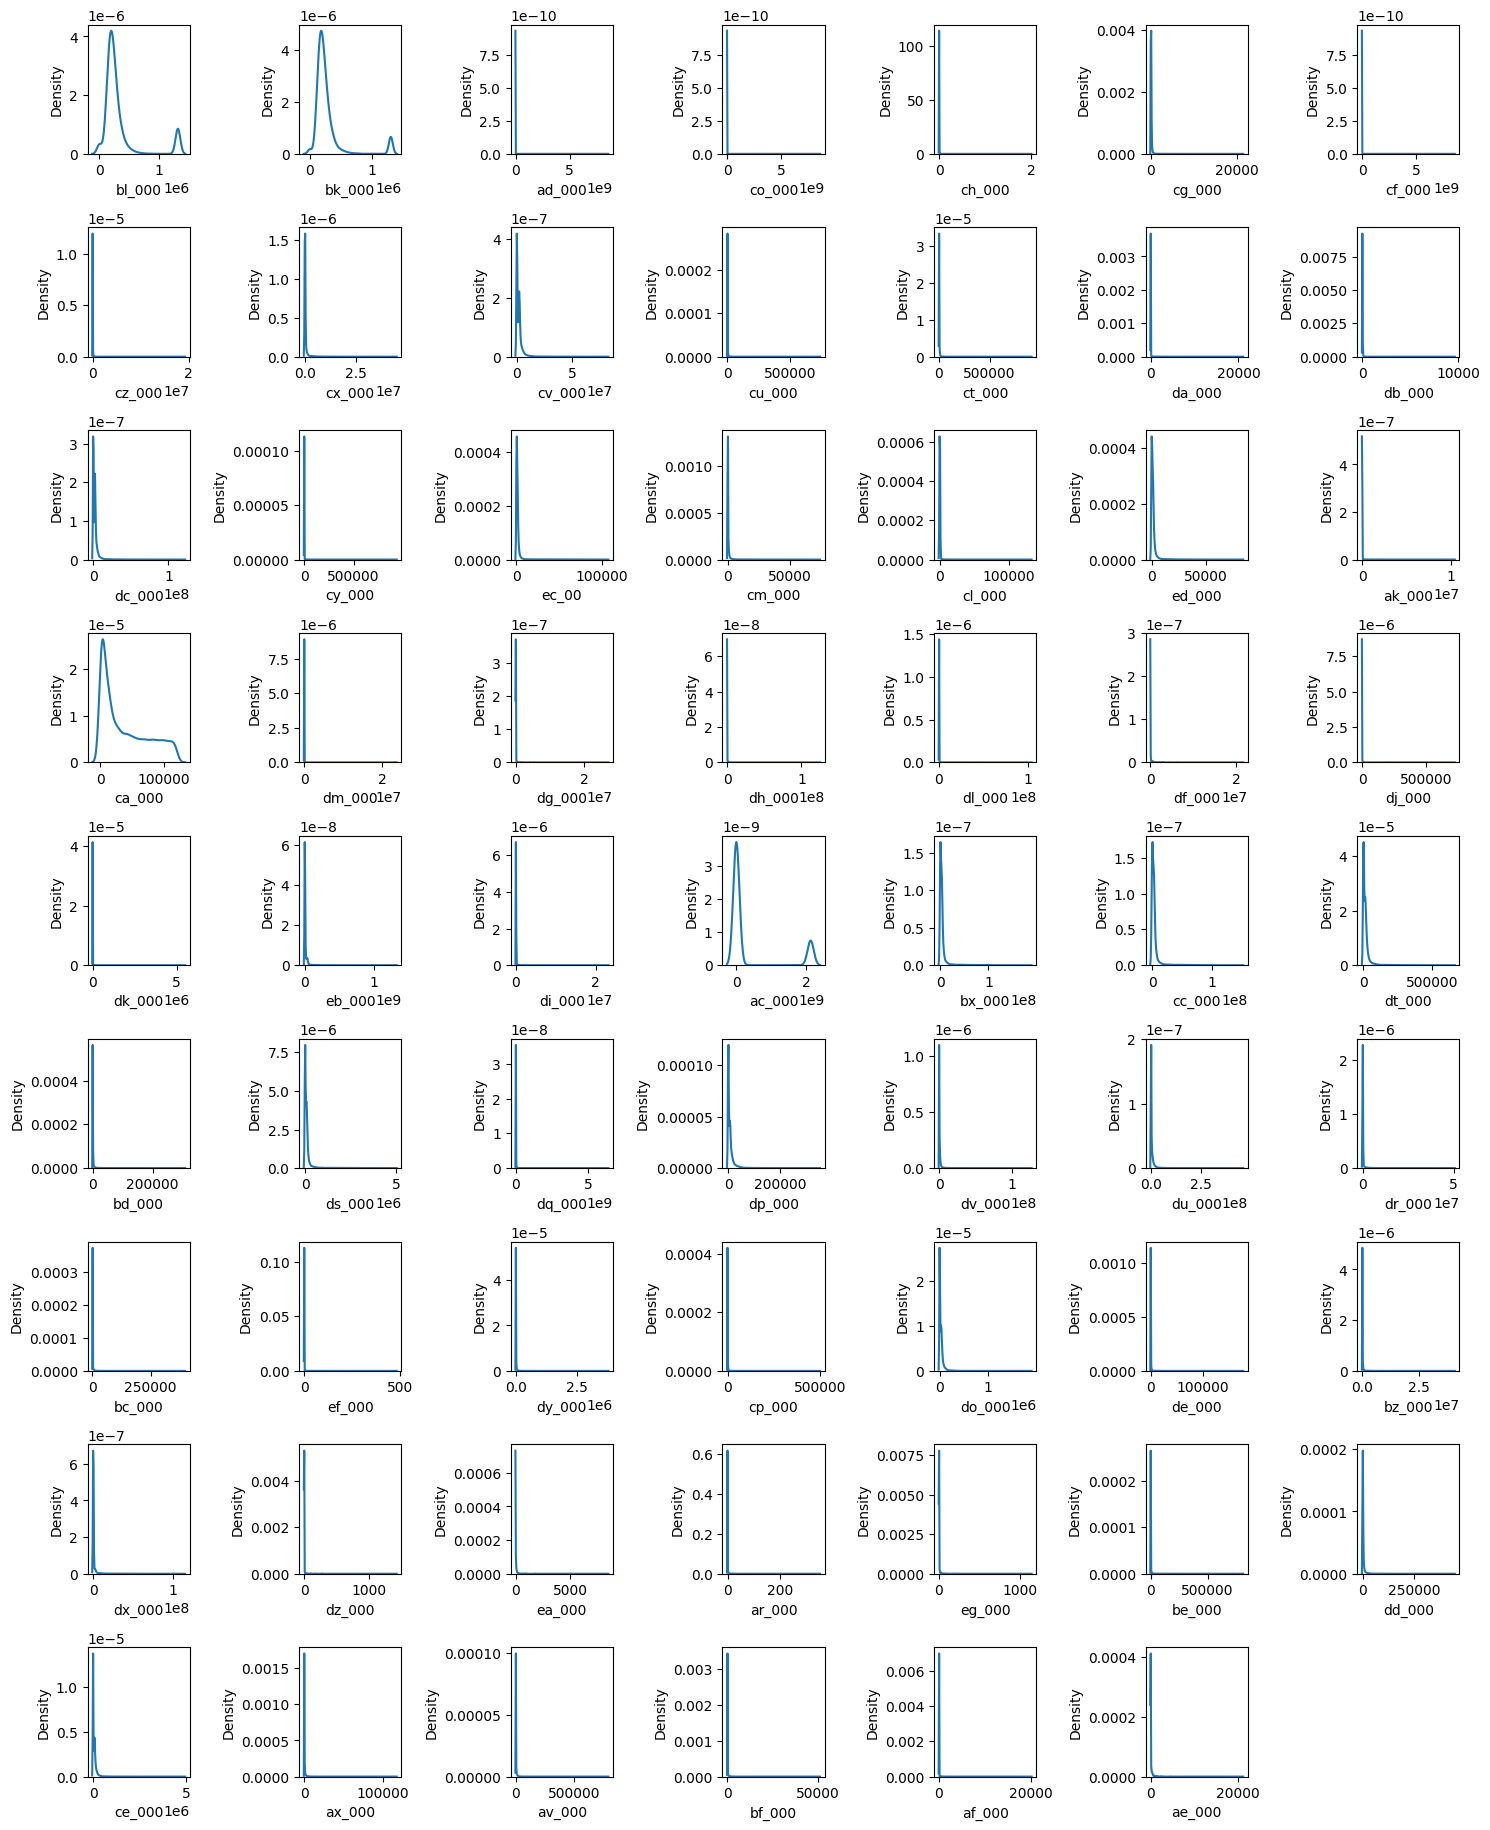

In [32]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    sns.kdeplot(df[missing_data_index_2000[i]])
    plt.tight_layout()
plt.show()

* 1st, treat the missing values
* 2nd, treat the outliers

In [38]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [39]:
x = df.drop('class',axis = 1)
y = df['class']

In [42]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


In [43]:
y.value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [35]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [44]:
knn_imputer = KNNImputer()
rs = RobustScaler()

In [48]:
# !pip install tqdm
from tqdm import tqdm
# import time

# # Your iterable (e.g., a list, range, etc.)
# iterable = range(10)

# # Wrap the iterable with tqdm
# for item in tqdm(iterable, desc="Processing", unit="item"):
#     # Your code here
#     time.sleep(0.1)  # Simulating some time-consuming task


Processing: 100%|██████████| 10/10 [00:01<00:00,  9.79item/s]


In [51]:
def cross_valscore(x,y):
  cross_val_scores = {}
  no_of_neighbors = [3,5,7,9]
  scorers = ['f1_weighted','balanced_accuracy']
  for j in tqdm(scorers):
    cross_val_scores[j] = {}
    for i in tqdm(no_of_neighbors):
      pipeline = Pipeline(steps = [('KNN-Imputer',KNNImputer(n_neighbors = i)),
                                  ('Logistic Regression',LogisticRegression())])
      score = cross_val_score(estimator = pipeline,
                              X = x,
                              y = y,
                              scoring = j,
                              cv = 5,
                              n_jobs = -1)
      cross_val_scores[j][i] = score
  return cross_val_scores

In [52]:
cross_valscore(x,y)

  0%|          | 0/2 [00:06<?, ?it/s]


KeyboardInterrupt: ignored